# LAB08 - WAVES

In this part of lab, you will compare experimental data from your tanks to theoretical models of shallow, intermediate and deep water waves.


## Step 1: Import tools

In [53]:
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Plot experimental data
The cell below provides code and data for Experiments 1 - 3. You will complete it by adding code and data for Experiment 4.

Text(0.5, 1.0, 'Deep Water Waves')

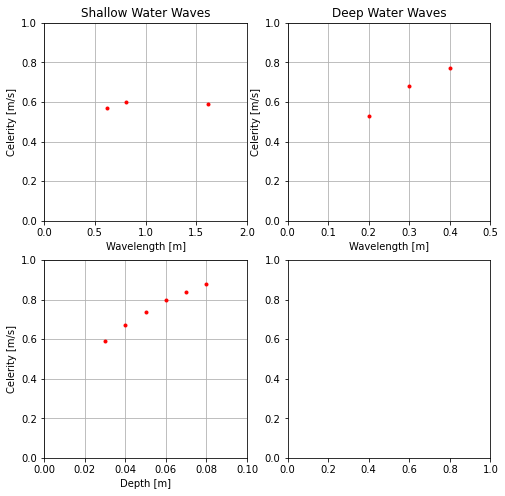

In [54]:
# Data Entry
# Rather than loading data (as we've done before), 
# each data set is entered manually as a one dimensional array, 
# where wavelength, depth and celerity are separate, 
# but corresponding, arrays of the same size. 
# Values are contained inside square brackets and separated by commas.

# Experimental data
# 1: SWW - wavelength
SWW_1_wavelen = np.array([0.62, 0.81, 1.62])
SWW_1_celerity = np.array([0.57, 0.60, 0.59])

# 2: SWW - depth
SWW_2_depth = np.array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
SWW_2_celerity = np.array([0.59, 0.67, 0.74, 0.80, 0.84, 0.88])

# 3: DWW - wavelength
DWW_3_wavelen = np.array([0.20, 0.30, 0.40])
DWW_3_celerity= np.array([0.53, 0.68, 0.77])

# 4: DWW - depth
# Following the examples above from Experiments 1-3, define arrays and
# enter the depth and celerity data you collected for Experiment 4 below.



# Plot experiments 1 - 3
fig, axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].plot(SWW_1_wavelen,SWW_1_celerity,'r.')
axs[0,0].set_xlim([0,2])
axs[0,0].set_ylim([0,1])
axs[0,0].grid()
axs[0,0].set_xlabel('Wavelength [m]')
axs[0,0].set_ylabel('Celerity [m/s]')
axs[0,0].set_title('Shallow Water Waves')

axs[1,0].plot(SWW_2_depth,SWW_2_celerity,'r.')
axs[1,0].set_xlim([0,0.10])
axs[1,0].set_ylim([0,1])
axs[1,0].grid()
axs[1,0].set_xlabel('Depth [m]')
axs[1,0].set_ylabel('Celerity [m/s]')

axs[0,1].plot(DWW_3_wavelen,DWW_3_celerity,'r.')
axs[0,1].set_xlim([0,0.50])
axs[0,1].set_ylim([0,1])
axs[0,1].grid()
axs[0,1].set_xlabel('Wavelength [m]')
axs[0,1].set_ylabel('Celerity [m/s]')
axs[0,1].set_title('Deep Water Waves')

# Following the examples above from Experiments 1-3, plot the data 
# for Experiment 4 in the remaining subplot (lower right).




## Step 3: Questions
Answer the questions pertaining to this figure on page 6 of your lab handout.

## Step 4: Define the theoretical wave models

There are three surface wave models:
1. deep water waves whose speed depend on wavelength,
2. shallow water waves whose speed depend on water depth, and
3. all waves (deep, intermediate, and shallow water) with a more complicated model.

In the code below, identify the 3 equations that describe celerity. The deep and shallow water wave equations should be familiar to you from class.

In [28]:
def deep_wave_speed(wavelen):
    # Speed of a deep water wave.
    # See Segar Chapter 9, p. 217.
    # wavelen = wavelength [meters]
    g = 9.81 # accel. due to gravity, [m/s2]
    return np.sqrt(g*wavelen/(2*np.pi))
    
def shallow_wave_speed(depth):
    # Speed of a shallow water wave.
    # See Segar Chapter 9, p. 222.
    # depth = water depth [meters]
    g = 9.81
    return np.sqrt(g*depth)
    
def all_wave_speed(wavelen,depth):
    # Generalized wave speed equation.
    # See Kundu, Cohen, Dowling, Fluid Mechanics, 6th Ed., Academic Press, 2015, ISBN: 9780124059351, p. 190-200 
    # wavelen = wavelength [meters]
    # depth = water depth [meters]
    g = 9.81 # accel. due to gravity, [m/s2]
    return np.sqrt((g*wavelen/(2*np.pi))*np.tanh(2*np.pi*depth/wavelen))

## Step 5: Use the wave models
One way to do this is to create a summary plot similar to Segar Fig. 9-16. We do this in several ways in the cells below.

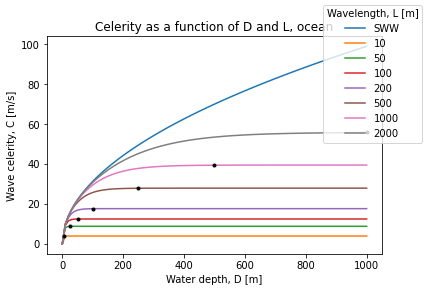

In [45]:
wavelengths = [10, 50, 100, 200, 500, 1000, 2000] # [meters]
water_depths = np.linspace(0,2000/2,101)


# Initialize the plot
fig, ax = plt.subplots()

# Plot the shallow water waves which only depend on depth
ax.plot(
    water_depths,
    shallow_wave_speed(water_depths))

# Plot the more generalized waves
for wavelen in wavelengths:
    ax.plot(
        water_depths,
        all_wave_speed(wavelen,water_depths))

# Annotate the plot
# (Deep water waves are plotted after
# annotation because otherwise there
# would be even more legend entries...)
legend_labels = list(map(str,wavelengths))
legend_labels.insert(0,'SWW')
fig.legend(legend_labels, title='Wavelength, L [m]')
ax.set_xlabel('Water depth, D [m]')
ax.set_ylabel('Wave celerity, C [m/s]')
ax.set_title('Celerity as a function of D and L, ocean')

# Plot the theoretical point at which deep water waves start
# (at the depth of the level of no motion, wavelen/2)
for wavelen in wavelengths:
    ax.plot(wavelen/2,
           deep_wave_speed(wavelen),'k.')

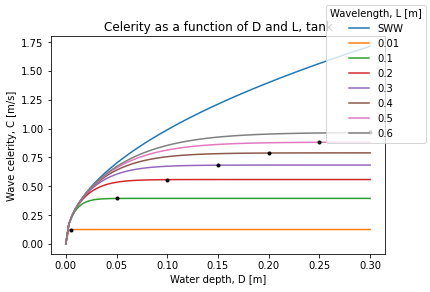

In [40]:
# This cell makes the same plot as above,
# but zoomed in on scales that are more 
# relevant for the tanks in lab.

# wavelengths = [0.01, 0.02, 0.05, 0.10, 0.2, 0.4]
# water_depths = np.linspace(0,0.4/2,101)

wavelengths = [0.01, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6]
water_depths = np.linspace(0,0.6/2,101)

# Initialize the plot
fig, ax = plt.subplots()

# Plot the shallow water waves which only depend on depth
ax.plot(
    water_depths,
    shallow_wave_speed(water_depths))

# Plot the more generalized waves
for wavelen in wavelengths:
    ax.plot(
        water_depths,
        all_wave_speed(wavelen,water_depths))

# Annotate the plot
# (Deep water waves are plotted after
# annotation because otherwise there
# would be even more legend entries...)
legend_labels = list(map(str,wavelengths))
legend_labels.insert(0,'SWW')
fig.legend(legend_labels, title='Wavelength, L [m]')
ax.set_xlabel('Water depth, D [m]')
ax.set_ylabel('Wave celerity, C [m/s]')
ax.set_title('Celerity as a function of D and L, tank')

# Plot the theoretical point at which deep water waves start
# (at the depth of the level of no motion, wavelen/2)
for wavelen in wavelengths:
    ax.plot(wavelen/2,
           deep_wave_speed(wavelen),'k.')


## Step 6: Questions
Use the second plot (tank scale) to answer the questions on page 7 of your lab handout.

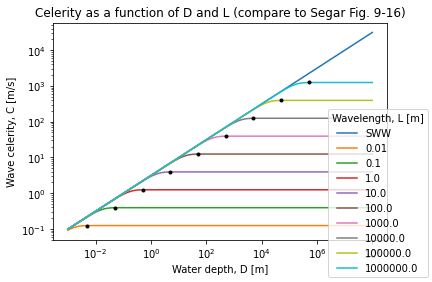

In [52]:
# This cell synthesizes the two previous cells
# by plotting the data over a very large range
# of scales with a log-log plot (both x and y
# axes are on a log10 scale, **not** a linear 
# scale.)

wavelengths = np.logspace(-2,6,num=9,base=10.0)
water_depths = np.logspace(-3,8,num=101,base=10.0)

# Initialize the plot
fig, ax = plt.subplots()

# Plot the shallow water waves which only depend on depth
ax.loglog(
    water_depths,
    shallow_wave_speed(water_depths))

# Plot the more generalized waves
for wavelen in wavelengths:
    ax.loglog(
        water_depths,
        all_wave_speed(wavelen,water_depths))

# Annotate the plot
# (Deep water waves are plotted after
# annotation because otherwise there
# would be even more legend entries...)
legend_labels = list(map(str,np.floor(wavelengths*100)/100))
legend_labels.insert(0,'SWW')
fig.legend(legend_labels, title='Wavelength, L [m]', loc='lower right')
ax.set_xlabel('Water depth, D [m]')
ax.set_ylabel('Wave celerity, C [m/s]')
ax.set_title('Celerity as a function of D and L (compare to Segar Fig. 9-16)')

# Plot the theoretical point at which deep water waves start
# (at the depth of the level of no motion, wavelen/2)
for wavelen in wavelengths:
    ax.loglog(wavelen/2,
           deep_wave_speed(wavelen),'k.')



## Step 7: Thought problem
Use the figure above and/or the celerity equation for all waves to describe the wave behavior (deep, intermediate, shallow) that would be exhibited by a tsunami with a wavelength of 100 km in the following regions:

* Traveling over a 5500 m abyssal plain?

* How will its celerity change as it travels over a 2500 m mid-ocean ridge?

* As it approaches the coast and begins to shoal over a 200 m continental shelf?